Analysis of variance (ANOVA) is a statistical model used to analyze differences between means.

It appears that ANOVA is sometimes used for feature selection.

[How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

We will perform feature extraction using ANOVA on a special dataset of "large p small n".


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
raw = pd.read_csv('../input/lncrnalncrna-of-pediatric-sarscov2/tpm_df (1).csv', index_col=0).T
supplement = pd.read_csv('../input/lncrnalncrna-of-pediatric-sarscov2/GSE172274_database.csv', index_col=0)

In [3]:
raw.head()

Geneid,ENST00000606034.1,ENST00000418300.1,ENST00000648183.1,ENST00000606993.1,ENST00000379317.1,ENST00000444968.1,ENST00000428932.1,ENST00000647566.1,ENST00000607222.1,ENST00000598846.1,...,ENST00000685479.1,ENST00000403371.2,ENST00000439759.6,ENST00000454228.1,ENST00000564612.2,ENST00000430794.1,ENST00000458331.1,ENST00000426367.1,ENST00000370438.2,ENST00000624054.2
SRR14267546,102.418396,960.655267,43.103437,511.877264,813.648599,139.335391,193.287532,137.541824,102.193357,20.182269,...,50.591571,56.351819,45.236414,45.471331,24.579472,78.152382,26.729628,27.395992,214.172555,212.663512
SRR14267547,209.965009,919.353448,36.199816,312.558458,393.748857,153.396477,153.048889,134.949780,73.505521,38.827138,...,43.748876,76.905211,17.915567,92.368334,29.028831,65.001636,32.053871,51.166355,91.024679,326.265354
SRR14267548,78.004932,959.657159,31.915486,426.924545,483.162617,108.559713,129.919097,113.735742,65.073654,26.586597,...,43.216915,82.398327,24.230820,80.370036,21.506893,50.904316,55.412201,52.179456,63.613920,305.385482
SRR14267549,180.856822,1529.023189,32.631239,296.870273,505.731693,79.376956,91.477435,72.143359,56.151991,30.725670,...,39.323759,78.524110,24.552678,74.474656,49.842229,57.046187,34.638163,49.491368,101.501172,213.752821
SRR14267550,23.810879,627.112841,29.297883,565.401586,656.116775,96.600793,227.259314,118.315474,118.513290,36.083185,...,85.147348,83.504073,24.395309,88.986850,38.600156,71.736586,23.099664,40.637375,167.180684,384.112731


In [4]:
supplement

,Accession,SRA,Run,Age,Sex,respiratory score
ID,,,,,,
COV-522,GSM5251603,SRX10629213,SRR14267546,19.00,male,1
COV-523,GSM5251604,SRX10629214,SRR14267547,10.00,female,1
COV-524,GSM5251605,SRX10629215,SRR14267548,9.00,male,1
COV-525,GSM5251606,SRX10629216,SRR14267549,10.00,male,1
COV-526,GSM5251607,SRX10629217,SRR14267550,20.00,male,1
COV-532,GSM5251609,SRX10629219,SRR14267552,19.00,male,1
COV-533,GSM5251610,SRX10629220,SRR14267553,0.42,male,1
COV-541,GSM5251611,SRX10629221,SRR14267554,1.00,female,1
COV-547,GSM5251613,SRX10629223,SRR14267556,5.00,male,1


Search for age-dependent transcripts in 3 groups: yonger age (0-5 years), middle age (9-10 years), and old age (19-20 years)

yonger age (0-5 years) 　→　0

middle age (9-10 years)　→　1

old age (19-20 years)　 →　2

In [5]:
columns = raw.columns
X = raw
y = 2,1,1,1,2,2,0,0,0,2

In [6]:
selector = SelectKBest(f_classif, k=10) # k is the number of features to be selected
X_new = selector.fit_transform(X, y)

In [7]:
print('feature importance: ', selector.scores_)

feature importance:  [4.42378785 1.09666325 0.82789515 ... 0.34266988 2.73136108 0.13117613]


In [8]:
print('pvalues: ', selector.pvalues_)

pvalues:  [0.05727607 0.38520219 0.47563039 ... 0.72114466 0.13279996 0.87916938]


In [9]:
feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(2345):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores [i])[1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

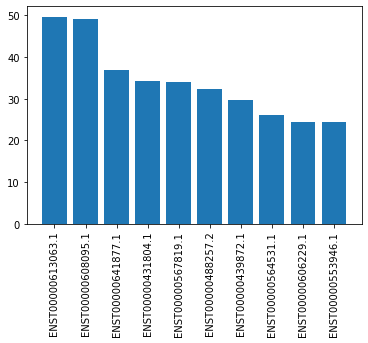

In [10]:
plt.bar(col_list[0:10],num_list[0:10])
plt.xticks(rotation=90)

To determine which features to adopt, the significance level is set to 0.05 in advance.

Features with F values greater than that value are rejected.

In [11]:
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dfn = 2 # Inter-level degrees of freedom(3-1)
dfd = 2343 # Intra-level degrees of freedom(2345-2)

upper 5%: 2.999565848655971


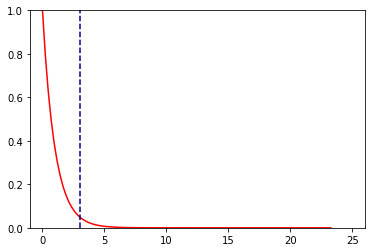

In [13]:
fig, ax = plt.subplots(1, 1)

plt.xlim(-1,26)
plt.ylim(0,1)
x = np.linspace(f.ppf(0.0000000001, dfn, dfd),f.ppf(0.9999999999, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-')
ax.axvline(f.ppf(0.95, dfn, dfd), ls = "--", color = "navy")
print('upper 5%:', f.ppf(0.95, dfn, dfd))

In [14]:
df = pd.DataFrame(num_list,index=col_list,columns=['importance'])
df

,importance
ENST00000613063.1,49.690195
ENST00000608095.1,49.031495
ENST00000641877.1,36.998508
ENST00000431804.1,34.208148
ENST00000567819.1,34.113395
...,...
ENST00000598970.2,0.004712
ENST00000418215.1,0.004466
ENST00000442828.2,0.004324
ENST00000457809.1,0.003162


In [15]:
DE = df[df["importance"]>f.ppf(0.95, dfn, dfd)]
DE

,importance
ENST00000613063.1,49.690195
ENST00000608095.1,49.031495
ENST00000641877.1,36.998508
ENST00000431804.1,34.208148
ENST00000567819.1,34.113395
...,...
ENST00000556383.1,3.010068
ENST00000692474.2,3.008072
ENST00000659152.1,3.007481
ENST00000559553.1,3.005268


We extracted 494 significant lncRNAs!
The lncRNA particularly important for age dependency was ENST00000613063.1.

In [16]:
DE.to_csv('DE.csv')